# Tema d'esame 15-02-2023

In [1]:
import numpy as np
import scipy.stats as sc
import matplotlib.pyplot as plt
import sys
sys.path.append("/home/gio/Desktop/LaboratorioCalcoloEStatistica/")
from mylib.basics import sturges
from mylib.function_study import maximum

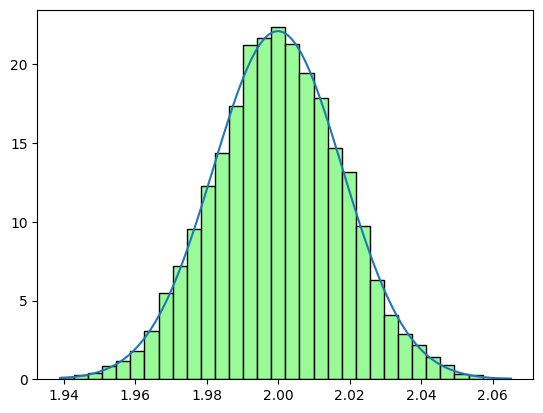

In [2]:
def rand_TCL_unif(size,a,b):
    def toy(N,a,b):
        return (a+np.random.rand(N)*(b-a)).mean()
    return np.array([toy(1000,a,b) for _ in range(size)])

N = 10000
a,b = 1,3
rand_gauss_unif = rand_TCL_unif(N,a,b)
m = np.mean(rand_gauss_unif)
s = np.std(rand_gauss_unif)

x = np.linspace(np.min(rand_gauss_unif),np.max(rand_gauss_unif),100)
plt.hist(rand_gauss_unif,edgecolor='black',color='palegreen',bins=sturges(N),density=True)
plt.plot(x,sc.norm.pdf(x,m,s))
plt.show()

$f(x) = - (x-2)^2 + 1$

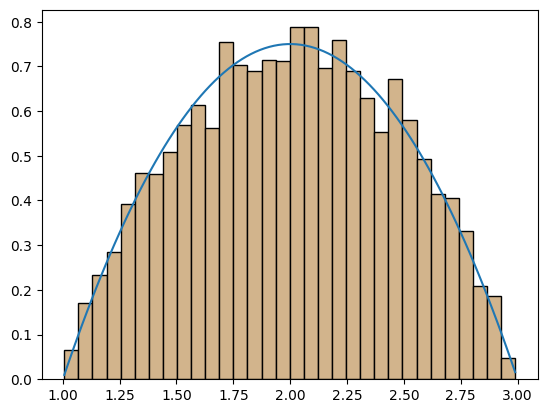

In [3]:
from mylib.integrals import crude_montecarlo

def f(x):
    return -(x-2)**2 + 1
area = crude_montecarlo(f,a,b)[0]

def rand_TAC_para(size,a,b,f=f):
    max = f(maximum(f,a,a+(1-0.618)*(b-a),a+0.618*(b-a),b))
    rand = np.empty(size,dtype=np.float64)
    count = 0
    while count < size:
        x = a + np.random.rand()*(b-a)
        y = np.random.rand()*max
        if y <= f(x):
            rand[count] = x
            count += 1
    return rand

pdf = lambda x: f(x)/area

N = 10000
rand = rand_TAC_para(N,a,b)
x = np.linspace(np.min(rand),np.max(rand),100)
plt.hist(rand,density=True,edgecolor='black',color='tan',bins=sturges(N))
plt.plot(x,pdf(x))
plt.show()

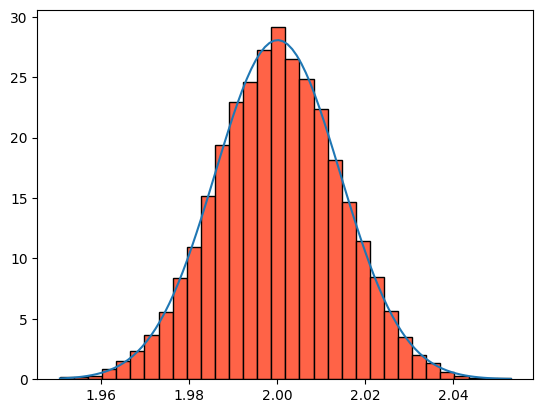

In [4]:
def rand_TCL_para(size,a,b):
    def toy(N,a,b):
        return (rand_TAC_para(N,a,b)).mean()
    return np.array([toy(1000,a,b) for _ in range(size)])

N = 10000
a,b = 1,3
rand_gauss_para = rand_TCL_para(N,a,b)
m = np.mean(rand_gauss_para)
s = np.std(rand_gauss_para)

x = np.linspace(np.min(rand_gauss_para),np.max(rand_gauss_para),100)
plt.hist(rand_gauss_para,edgecolor='black',color='tomato',bins=sturges(N),density=True)
plt.plot(x,sc.norm.pdf(x,m,s))
plt.show()

In [5]:
# rand_gauss_para, rand_gauss_unif
from mylib.radom_numbers import Stats

s_para = Stats(rand_gauss_para)
s_unif = Stats(rand_gauss_unif)

print(s_para,s_unif)

        mean: 2.000084829438078
        var : 0.00020199930072259577
        skew: -0.016503836861210982
        kurt: -0.02762783947161962
        std : 0.01421264580303737
                 mean: 1.9999021112825457
        var : 0.0003255899996717877
        skew: 0.009028534712016017
        kurt: -0.016297684889849506
        std : 0.018044112604165042
        
